# 1 - Gathering

 * Gather twitter-archive-enhanced


In [572]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import os

archive_df = pd.read_csv('Data\\twitter-archive-enhanced.csv')
archive_df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### - Gather image-prediction from a link


In [573]:


file_name = "image-predictions.tsv"

if not os.path.exists(f'Data\\{file_name}'):
    with open(os.path.join(url.split("/")[-1]),mode="wb") as file:
        url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
        response = requests.get(url)
        file.write(response.content)
    
Image_predictions_df = pd.read_csv('Data\\image-predictions.tsv',sep="\t")
Image_predictions_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


 - Gather tweet-json from a text and extract id,retweet_count and favorite_count


In [574]:

if not os.path.exists('Data//tweet-json.txt'):
    os.rename('Data//tweet-json copy','Data//tweet-json.txt') 

f = open('Data//tweet-json.txt',"r") 
# json.loads(f.read())
data = [json.loads(line) for line in f]
#json.loads(f.read())
data
column_names =["id","retweet_count","favorite_count"]
dictionary={
            column_names[0]:[i["id"] for i in data],
            column_names[1]:[i["retweet_count"] for i in data],
            column_names[2]:[i["favorite_count"] for i in data],
           }
api_df = pd.DataFrame(dictionary)
api_df.head()


,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# - Assessing
> #### Archive Data : 
> #### Image Predictions :
> #### This is bold text :


In [575]:
#checking data types of each column
#checkin null values 
#checking column names 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [576]:
# show stats for the column
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [577]:
# show the values and it is count in each column in dataset
for i in archive_df.columns:
    print(f"{i} => \n{archive_df[i].value_counts()} \n\n")

tweet_id => 
749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64 


in_reply_to_status_id => 
6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64 


in_reply_to_user_id => 
4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+0

In [578]:
# show the number of dublicated rows 
sum(archive_df.duplicated())

0

In [579]:
#checking data types of each column
#checkin null values 
#checking column names 
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [580]:
#checking data types of each column
#checkin null values 
#checking column names 
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# - Clean
> #### - archive_df
> #### - Image_predictions_df
> #### - api_df

## 1 - Quality Issues
> ## ( archive_df ) : 
> #### 1 - Remove the retweet rows.
> #### 2 - Drop the unneeded rows.
> #### 3 - Drop rows thar have no expanded images.
> #### 4 - Transform timestamp column from string(object) into datetime.
> #### 5 - Transform tweet_id column from int into string.
> #### 6 - show and extract names from text that have 'a' values.
> #### 7 - capitalize name column.
> #### 8 - extract rating from text and add a new column called "rating" instead of "rating_numerator" and "rating_denominator".

> ## ( image_predictions_df ) : 
> #### 10 - Transform tweet_id column from int into string.
> #### 11 - rename p1,p2,p3,p1_dog......

> ## ( api_df ) : 
> #### 12 - renanme id to  tweet_id column and transform from int into string.
## 2 - Tidy Issues
> #### 1 - replace None values from doggo,floofer,pupper and puppo to "" and concat all columns to new column "dog_stage" and              drop doggo,floofer,pupper and puppo 

> #### 2 - Merge the 3 datasets in one dataset

In [581]:
# it takes copy from each of these datasets to be manibulated without missing the source
archive_df_cleaned = archive_df.copy()
Image_predictions_df_cleaned = Image_predictions_df.copy()
api_df_cleaned = api_df.copy()


In [582]:
# this code for removing the non original rows (retweets). (Issue #1)
retweets_ids = list(archive_df_cleaned[archive_df_cleaned.retweeted_status_id.notnull() | archive_df_cleaned.in_reply_to_status_id.notnull()].tweet_id)
# Drop Retweetsfrom archive_df_cleaned
archive_df_cleaned = archive_df_cleaned[~archive_df_cleaned.tweet_id.isin(retweets_ids)]
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [583]:
# it for drop the columns that we do not need (Issue #2)
archive_df_cleaned.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace = True)
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [584]:
# it is for removing the rows that have no expanded urls. (Issue #3)
archive_df_cleaned = archive_df_cleaned[archive_df['expanded_urls'].notnull()]
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


<ipython-input-584-08ea86fc6044>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  archive_df_cleaned = archive_df_cleaned[archive_df['expanded_urls'].notnull()]


In [585]:
# it is for transforming timestamp data from string(object) into datetime. (Issue #4)
archive_df_cleaned['timestamp'] = pd.to_datetime(archive_df_cleaned['timestamp'])
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [586]:
# it is for transforming tweet_id data from int into string. (Issue #5)
archive_df_cleaned['tweet_id'] = archive_df_cleaned['tweet_id'].astype(str)
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [587]:
# show count of name columns that have 'a' value.(Issue #6)
archive_df_cleaned.name.value_counts()
len(archive_df_cleaned[archive_df_cleaned.name=="a"].text.index)


55

In [588]:
# extract names from text that contain 'a' values.(Issue #6)
regex = r"This is \w\w\w+|His name is \w+|Meet \w+|Say hello to \w+|named \w+"

#looping over data frame raws which contain name value "a" and try to extract the right name from column text 
for text ,index in zip(archive_df_cleaned[archive_df_cleaned.name=="a"].text,archive_df_cleaned[archive_df_cleaned.name=="a"].index) :
    try:
        name = re.findall(regex,text)[0].split()[-1]
        #assignig the found name to the row of data frame 
        archive_df_cleaned.at[index, 'name'] = name
    except IndexError as e:
        pass
    
archive_df_cleaned.name.value_counts()


None       600
a           35
Charlie     11
Lucy        11
Cooper      10
          ... 
Chevy        1
Happy        1
Kaia         1
Tripp        1
Trip         1
Name: name, Length: 972, dtype: int64

In [589]:
# it is for capitalize name column.(Issue #7)
archive_df_cleaned['name'] = archive_df_cleaned['name'].str.capitalize()
archive_df_cleaned.name.value_counts()

None          600
A              35
Lucy           11
Charlie        11
Cooper         10
             ... 
Jarvis          1
Chevy           1
Happy           1
Officially      1
Trip            1
Name: name, Length: 972, dtype: int64

In [453]:
# extract rating from text column and add rating column.(Issue #8)
regex = r"(\d+\.?\d*\/\d+)"
rating = []
#looping over data frame raws which contain name value "a" and try to extract the right name from column text 
for text ,index in zip(archive_df_cleaned.text,archive_df_cleaned.index) :
    try:
        name = re.search(regex,text).group()
        rating.append(name)
    except IndexError as e:
        pass
    
archive_df_cleaned['rating'] = rating
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
 12  rating              2094 non-null 

In [454]:
# drop rating_denominator and rating_numerator.(Issue #8)
archive_df_cleaned.drop(['rating_denominator','rating_numerator'],axis=1,inplace=True)
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2094 non-null   object             
 1   timestamp      2094 non-null   datetime64[ns, UTC]
 2   source         2094 non-null   object             
 3   text           2094 non-null   object             
 4   expanded_urls  2094 non-null   object             
 5   name           2094 non-null   object             
 6   doggo          2094 non-null   object             
 7   floofer        2094 non-null   object             
 8   pupper         2094 non-null   object             
 9   puppo          2094 non-null   object             
 10  rating         2094 non-null   object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 276.3+ KB


In [590]:
# replace None values from doggo,floofer,pupper and puppo to "".(Issue #9)
archive_df_cleaned.doggo = archive_df_cleaned.doggo.replace("None","")
archive_df_cleaned.floofer = archive_df_cleaned.floofer.replace("None","")
archive_df_cleaned.pupper = archive_df_cleaned.pupper.replace("None","")
archive_df_cleaned.puppo = archive_df_cleaned.puppo.replace("None","")
# concat all columns to new column dog_stage.(Issue #9)
archive_df_cleaned["dog_stage"]= archive_df_cleaned["doggo"] +archive_df_cleaned["floofer"]+archive_df_cleaned["pupper"]+archive_df_cleaned["puppo"]

#displaying dog_stage to find concatenated stages.(Issue #9)
archive_df_cleaned.dog_stage.value_counts()

                1759
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [592]:
# add hyphen to any concatenated 
archive_df_cleaned.dog_stage=archive_df_cleaned.dog_stage.replace("doggopupper","doggo-pupper")
archive_df_cleaned.dog_stage=archive_df_cleaned.dog_stage.replace("doggofloofer","doggo-floofer")
archive_df_cleaned.dog_stage=archive_df_cleaned.dog_stage.replace("doggopuppo","doggo-puppo")
archive_df_cleaned.dog_stage.value_counts()


pupper           220
doggo             72
puppo             23
floofer            9
doggo-pupper       9
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [593]:
# transform "" to null values.
archive_df_cleaned.dog_stage = archive_df_cleaned.dog_stage.replace("",np.nan)
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
 12  dog_stage           335 non-null  

'13.5/10'

In [597]:
# drop doggo,floofer,pupper and puppo columns.(Issue tidy #1)
archive_df_cleaned.drop(["doggo" ,"floofer" ,"pupper","puppo"],axis=1 ,inplace=True)

archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   dog_stage           335 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 243.6+ KB


In [599]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   dog_stage           335 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 243.6+ KB


In [602]:
#Transform tweet_id column from int into string.
Image_predictions_df_cleaned.tweet_id = Image_predictions_df_cleaned.tweet_id.astype(str)
Image_predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [603]:
# rename id to tweet_id column.(Issue #10)
api_df_cleaned = api_df_cleaned.rename(columns = {'id': 'tweet_id'})

In [604]:
api_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [605]:
# rename these columns
Image_predictions_df_cleaned = Image_predictions_df_cleaned.rename(columns = {'p1' : 'prediction_1','p2' : 'prediction_2',
                                                                             'p3' : 'prediction_3','p1_dog' : 'prediction_1_is_dog','p2_dog' : 'prediction_2_is_dog',
                                                                             'p3_dog' : 'prediction_3_is_dog','p1_conf' : 'prediction_1_confidence',
                                                                             'p2_conf' : 'prediction_2_confidence','p3_conf' : 'prediction_3_confidence'})
Image_predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_is_dog      2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_is_dog      2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_is_dog      2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [618]:
# Transform tweet_id column from int into string.(Issue #)
api_df_cleaned['tweet_id'] = api_df_cleaned['tweet_id'].astype(str)

In [606]:
#cheking for names and its count 
for name,count in zip(archive_df_cleaned.name.value_counts().sort_values(ascending=False).index.tolist(),archive_df_cleaned.name.value_counts(ascending=False).sort_values(ascending=False)):
    print("count is :{}\tname is :{}".format(count,name))

count is :600	name is :None
count is :35	name is :A
count is :11	name is :Lucy
count is :11	name is :Charlie
count is :10	name is :Cooper
count is :10	name is :Oliver
count is :9	name is :Tucker
count is :9	name is :Penny
count is :8	name is :Winston
count is :8	name is :Sadie
count is :8	name is :The
count is :8	name is :Lola
count is :7	name is :Daisy
count is :7	name is :Toby
count is :6	name is :Jax
count is :6	name is :Oscar
count is :6	name is :Bailey
count is :6	name is :Bella
count is :6	name is :Stanley
count is :6	name is :An
count is :6	name is :Koda
count is :6	name is :Bo
count is :5	name is :Scout
count is :5	name is :Bentley
count is :5	name is :Milo
count is :5	name is :Louis
count is :5	name is :Chester
count is :5	name is :Buddy
count is :5	name is :Dave
count is :5	name is :Leo
count is :5	name is :Rusty
count is :4	name is :Boomer
count is :4	name is :Reggie
count is :4	name is :Clarence
count is :4	name is :Clark
count is :4	name is :Larry
count is :4	name is :Phil

In [620]:
# copy data for merging
archive_df_cleaned_2 = archive_df_cleaned.copy()
Image_predictions_df_cleaned_2 = Image_predictions_df_cleaned.copy()
api_df_cleaned_2 = api_df_cleaned.copy()

In [621]:
# merge archive_df_cleaned_2 and Image_predictions_df_cleaned2
tweets_data_df = archive_df_cleaned_2.merge(Image_predictions_df_cleaned2, how='inner', on='tweet_id')

In [622]:
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1971 non-null   object             
 1   timestamp                1971 non-null   datetime64[ns, UTC]
 2   source                   1971 non-null   object             
 3   text                     1971 non-null   object             
 4   expanded_urls            1971 non-null   object             
 5   rating_numerator         1971 non-null   int64              
 6   rating_denominator       1971 non-null   int64              
 7   name                     1971 non-null   object             
 8   dog_stage                303 non-null    object             
 9   jpg_url                  1971 non-null   object             
 10  img_num                  1971 non-null   int64              
 11  prediction_1             1971 

In [623]:
# merge tweets_data_df and api_df_cleaned_2
tweets_data_df_all = tweets_data_df.merge(api_df_cleaned_2, how='inner', on='tweet_id')

In [470]:
tweets_data_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1971 non-null   object             
 1   timestamp                1971 non-null   datetime64[ns, UTC]
 2   source                   1971 non-null   object             
 3   text                     1971 non-null   object             
 4   expanded_urls            1971 non-null   object             
 5   name                     1971 non-null   object             
 6   rating                   1971 non-null   object             
 7   dog_stage                303 non-null    object             
 8   jpg_url                  1971 non-null   object             
 9   img_num                  1971 non-null   int64              
 10  prediction_1             1971 non-null   object             
 11  prediction_1_confidence  1971 

# - Storing, Analyzing, and Visualizing Data for this Project

In [625]:
# store dataframe to twitter_archive_master.csv
tweets_data_df_all.to_csv('Data//twitter_archive_master.csv',index=False)

In [626]:
twitter_archive_master = pd.read_csv('Data\\twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1971 non-null   int64  
 1   timestamp                1971 non-null   object 
 2   source                   1971 non-null   object 
 3   text                     1971 non-null   object 
 4   expanded_urls            1971 non-null   object 
 5   rating_numerator         1971 non-null   int64  
 6   rating_denominator       1971 non-null   int64  
 7   name                     1971 non-null   object 
 8   dog_stage                303 non-null    object 
 9   jpg_url                  1971 non-null   object 
 10  img_num                  1971 non-null   int64  
 11  prediction_1             1971 non-null   object 
 12  prediction_1_confidence  1971 non-null   float64
 13  prediction_1_is_dog      1971 non-null   bool   
 14  prediction_2            

In [629]:
# show the row that have min favorite_count
tweet = twitter_archive_master[twitter_archive_master.favorite_count == twitter_archive_master.favorite_count.min()]
tweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,prediction_1_confidence,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favorite_count
1954,666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,16,81


In [630]:
# show the row that have min retweet_count
tweet = twitter_archive_master[twitter_archive_master.retweet_count == twitter_archive_master.retweet_count.min()]
tweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,prediction_1_confidence,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favorite_count
1954,666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,16,81


In [631]:
# show the row that have max favorite_count

tweet = twitter_archive_master[twitter_archive_master.favorite_count == twitter_archive_master.favorite_count.max()]
tweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,prediction_1_confidence,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favorite_count
306,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810


In [633]:
# show the row that have maxmax retweet_count

tweet = twitter_archive_master[twitter_archive_master.retweet_count == twitter_archive_master.retweet_count.max()]
tweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,prediction_1_confidence,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favorite_count
769,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


In [634]:
# print mode in these columns
print(twitter_archive_master.prediction_1.mode()[0])
print(twitter_archive_master.prediction_2.mode()[0])
print(twitter_archive_master.prediction_3.mode()[0])

golden_retriever
Labrador_retriever
Labrador_retriever


In [635]:
print(twitter_archive_master.dog_stage.mode()[0])

pupper


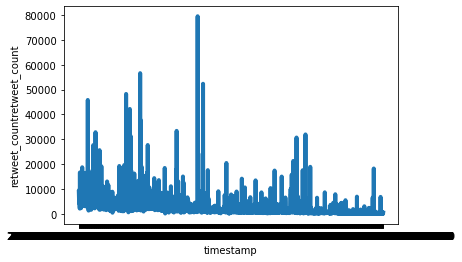

In [541]:
# show a visualization between timestamp and retweet_count
plt.plot(np.array(twitter_archive_master['timestamp']),
np.array(twitter_archive_master['retweet_count']),linewidth=4)
plt.ylabel("retweet_countretweet_count") 
plt.xlabel("timestamp")  
plt.show()

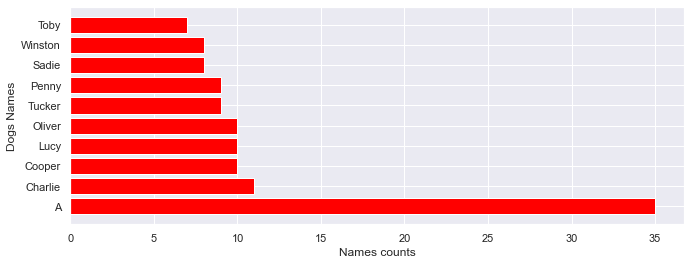

In [546]:
# show a visualization between name and it is count

names=twitter_archive_master.name.value_counts(ascending=False).sort_values(ascending=False).index.tolist()[1:11]
counts=twitter_archive_master.name.value_counts(ascending=False).sort_values(ascending=False).tolist()[1:11]
plt.barh(names,
counts,color='#f00')
plt.ylabel("Dogs Names") 
plt.xlabel("Names counts")  
plt.show()

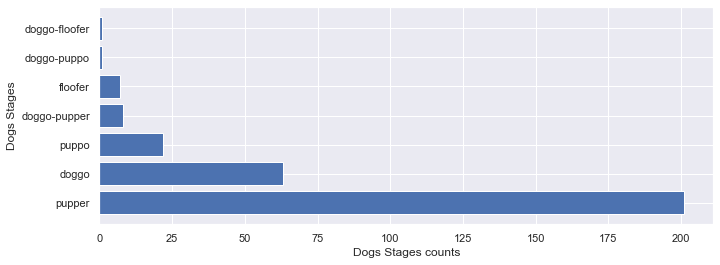

In [639]:
# show a visualization between a dog breeds and it is count

breeds=twitter_archive_master.dog_stage.value_counts(ascending=False).sort_values(ascending=False).index.tolist()
counts=twitter_archive_master.dog_stage.value_counts(ascending=False).sort_values(ascending=False).tolist()
plt.barh(breeds,
counts)
plt.ylabel("Dogs Stages") 
plt.xlabel("Dogs Stages counts")  
plt.show()

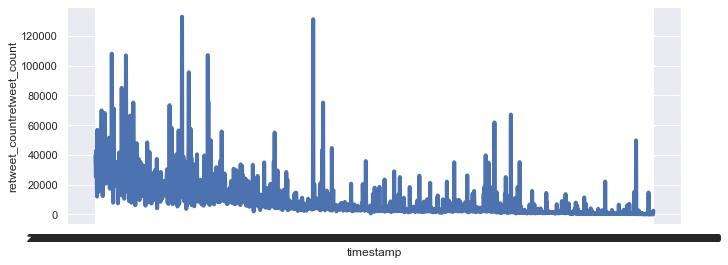

In [550]:
# show a visualization between timestamp and it is favorite_count

plt.plot(np.array(twitter_archive_master['timestamp']),
np.array(twitter_archive_master['favorite_count']),linewidth=4)
plt.ylabel("retweet_countretweet_count") 
plt.xlabel("timestamp")  
plt.show()

In [637]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1971 non-null   int64  
 1   timestamp                1971 non-null   object 
 2   source                   1971 non-null   object 
 3   text                     1971 non-null   object 
 4   expanded_urls            1971 non-null   object 
 5   rating_numerator         1971 non-null   int64  
 6   rating_denominator       1971 non-null   int64  
 7   name                     1971 non-null   object 
 8   dog_stage                303 non-null    object 
 9   jpg_url                  1971 non-null   object 
 10  img_num                  1971 non-null   int64  
 11  prediction_1             1971 non-null   object 
 12  prediction_1_confidence  1971 non-null   float64
 13  prediction_1_is_dog      1971 non-null   bool   
 14  prediction_2            